In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import datetime
import networkx as nx
import pickle
import operator
#import pygraphviz 


In [3]:
df=pandas.read_csv('/home/juliaponcela/at_NICO/Supply_networks/Results/Simplified_stata_file_Pinf_vs_mulitiple_variables_monthly_slicing_dropped_overlaps_randomly_from_list_SORTED_CHRONOLOGICALLY.csv', 
                   sep=' ',parse_dates=['start_date_trans','end_date_trans'])

/home/juliaponcela/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df


,P_inf,Mi,Cj,Mi_Cj,MCJ,num_trans,start_date_trans,start_time_trans,end_date_trans,end_time_trans,...,avg_dist_j_to_inf,degree_asym_ij,business_asym_ij,zs_error_rate_ij_year_degree,Dist,zip1,zip2,core_score_year_i,core_score_year_j,Unnamed: 66
0,0,102428,20590538,102428_20590538,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,5.732673e+00,0.020408,0.100505,0.986396,45.968269,10018.0,11779,0.958333,0.666667,NaN
1,1,2701078,402001,2701078_402001,1,2,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.820000e+00,0.669421,0.401927,1.986364,1084.450262,64116.0,7503,0.328947,0.875000,NaN
2,0,2701078,403431,2701078_403431,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.909203,0.730253,1091.063772,64116.0,7030,0.328947,0.370370,NaN
3,0,2701078,403477,2701078_403477,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.509241,1.588357,1091.063772,64116.0,7030,0.328947,1.000000,NaN
4,0,2701078,405851,2701078_405851,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.970217,1.968710,NaN,64116.0,NaN,0.328947,1.000000,NaN
5,0,2701078,408451,2701078_408451,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.766564,0.152215,1091.182651,64116.0,7087,0.328947,0.541667,NaN
6,0,2701078,408591,2701078_408591,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.819613,1.939757,NaN,64116.0,NaN,0.328947,0.500000,NaN
7,0,2701078,409157,2701078_409157,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,5.782178e+00,0.444444,0.090666,1.903995,1083.467722,64116.0,7114,0.328947,0.450000,NaN
8,0,2701078,5212219,2701078_5212219,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376e+00,0.669421,0.819149,1.599235,NaN,64116.0,NaN,0.328947,1.000000,NaN
9,0,3200280,1000019,3200280_1000019,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,2.019802e+00,0.990244,0.996631,-1.230934,NaN,11204.0,NaN,1.000000,0.873899,NaN


In [24]:
list_jobbers_tot = pickle.load(open("/home/juliaponcela/at_NICO/Supply_networks/Results/List_jobbers_tot.dat")) 
print "# jobbers:",len(list_jobbers_tot)

# jobbers: 496


In [28]:
lista_m=[]
lista_c=[]

print "# jobbers:",len(list_jobbers_tot)

print 

for item in df.Mi:
    if item not in list_jobbers_tot:
        lista_m.append(int(item))
    
print len(lista_m)    
lista_m=list(set(lista_m))
print "# manuf.:",len(lista_m)


pickle_manuf="/home/juliaponcela/at_NICO/Supply_networks/Results/List_manufacturers_tot.dat"
pickle.dump(lista_m, open(pickle_manuf, 'wb'))
print "written:",pickle_manuf



print 
for item in df.Cj:
    if item not in list_jobbers_tot:
        lista_c.append(int(item))
    
      
print len(lista_c)    
lista_c=list(set(lista_c))
print "# contr.:",len(lista_c)  
pickle_contr="/home/juliaponcela/at_NICO/Supply_networks/Results/List_contractors_tot.dat"
pickle.dump(lista_c, open(pickle_contr, 'wb'))
print "written:",pickle_contr



# jobbers: 496

214691
# manuf.: 921
written: /home/juliaponcela/at_NICO/Supply_networks/Results/List_manufacturers_tot.dat

260477
# contr.: 7272
written: /home/juliaponcela/at_NICO/Supply_networks/Results/List_contractors_tot.dat


In [26]:
496+921+7272


8689

In [7]:
df.columns


Index([u'P_inf', u'Mi', u'Cj', u'Mi_Cj', u'MCJ', u'num_trans',
       u'start_date_trans', u'start_time_trans', u'end_date_trans',
       u'end_time_trans', u'first_day_trans', u'last_day_trans',
       u'length_trans', u'period_end', u'first_date_mi_cj',
       u'first_time_mi_cj', u'first_day_mi_cj', u'net_adj_gross',
       u'tot_pos_gross', u'tot_neg_gross', u'frac_neg_pos', u'acumm_pos_gross',
       u'accum_num_trans', u'k_M_fin', u'k_C_fin', u'num_M_i', u'num_C_i',
       u'num_J_i', u'num_M_j', u'num_C_j', u'num_J_j', u'k_M_fin_accum',
       u'k_C_fin_accum', u'artificial_start_date_trans',
       u'artificial_start_time_trans', u'overlap', u'year', u'N', u'L',
       u'CC_m_fin', u'CC_c_fin', u'betweenness_m_fin', u'betweenness_c_fin',
       u'max_clique_size_m_fin', u'max_clique_size_c_fin', u'kshell_m_fin',
       u'kshell_c_fin', u'p_inf_prev_trans', u'accum_inf_prev_ij',
       u'accum_inf_prev_neighb_i', u'frac_accum_inf_prev_neighb_i',
       u'accum_inf_prev_neighb_j'

In [8]:
len(df.columns)

67

In [9]:
df.describe


<bound method DataFrame.describe of         P_inf        Mi        Cj            Mi_Cj  MCJ  num_trans  \
0           0    102428  20590538  102428_20590538    1          1   
1           1   2701078    402001   2701078_402001    1          2   
2           0   2701078    403431   2701078_403431    1          1   
3           0   2701078    403477   2701078_403477    1          1   
4           0   2701078    405851   2701078_405851    1          1   
5           0   2701078    408451   2701078_408451    1          1   
6           0   2701078    408591   2701078_408591    1          1   
7           0   2701078    409157   2701078_409157    1          1   
8           0   2701078   5212219  2701078_5212219    1          1   
9           0   3200280   1000019  3200280_1000019    1          1   
10          0   9101020   1000019  9101020_1000019    1          1   
11          0    504622    511951    504622_511951    1          1   
12          0   9101366   1000019  9101366_1000019    

In [10]:
for i in range(5):
    print df.iloc[1]
    print
 
    


P_inf                                             1
Mi                                          2701078
Cj                                           402001
Mi_Cj                                2701078_402001
MCJ                                               1
num_trans                                         2
start_date_trans                1985-01-01 00:00:00
start_time_trans                           00:00:00
end_date_trans                  1985-01-04 00:00:00
end_time_trans                             00:00:00
first_day_trans                                   0
last_day_trans                                    3
length_trans                                      4
period_end                                        1
first_date_mi_cj                         1985-01-01
first_time_mi_cj                           00:00:00
first_day_mi_cj                                   0
net_adj_gross                                -41842
tot_pos_gross                                   947
tot_neg_gros

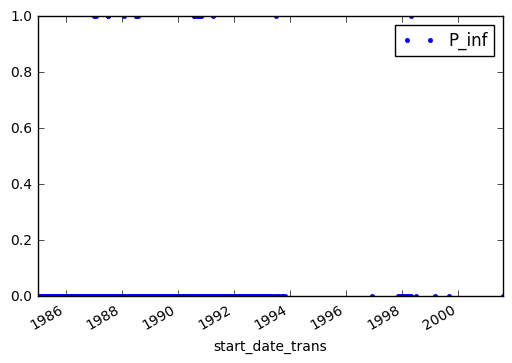

In [11]:
test=df[df['Mi_Cj'].str.startswith('6203279_')]   # i get a subsample of the data: only those columns with 
test.plot(x='start_date_trans',y='P_inf',ls='',marker='.')  # method of the datafram to plot directly!!
#.str.startswith is a method to get only the selection of data i want
# _  means whatever the last output from the last cell was

#test.set_index('start_date_trans').plot()  # i can plot all variables at once
#test.set_index('start_date_trans')  # this part is to set which one is my x variable

#test.set_index('start_date_trans').groupby(pandas.TimeGrouper('MS')).apply(lambda x: len(x['Cj'].unique())).plot()
#test.set_index('start_date_trans').resample('M')['Cj'].apply(lambda x: len(x.unique())).plot()  


num. points: 1382
num. unique contractors: 177
len_x: 1382  len_y: 1382
for errors len_x: 73  len_y: 73


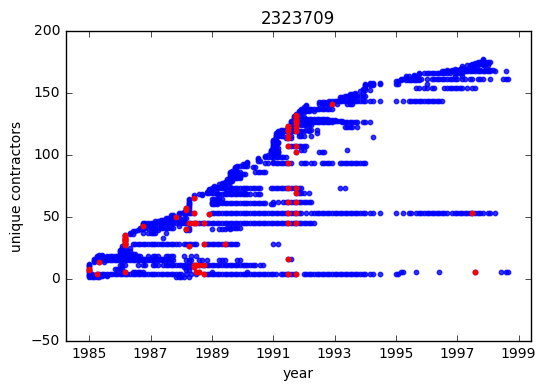

In [4]:
ID="2323709"   #2323709"   #2391375"    #6203152"   #116191"   #113694"  #2300783"
#"102982"  #6203152"#504506"  #"101059"  OJO IS ES CONTRACTOR ES "_"+ID Y MANUFACT ES DI+"_"

cont=0
cont_unique_contractors=1
dict_contr_id_cont_contractor={}
list_rows=[]
list_for_dropping=[]
contractors=[]
list_days=[]
list_days_errors=[]

list_Pinf=[]

y_values=[]
y_values_errors=[]

for index, row in df.iterrows():
   
    
    if ID+"_" in row['Mi_Cj']:#   or "_"+ID in row['Mi_Cj']:   # for manuf. or contr., respectively
        list_rows.append(row) 
        
        contractor=row['Cj']
        contractors.append(contractor)         
        
        if contractor not in dict_contr_id_cont_contractor:            
            dict_contr_id_cont_contractor[contractor]=cont_unique_contractors                    
            cont_unique_contractors +=1
        
        initial_date_transaction=row['start_date_trans']
        final_date_transaction=row['end_date_trans']
        
        #year=int(row['start_date_trans'].split("-")[0])    # example of date:  1985-01-01     
        #month=int(row['start_date_trans'].split("-")[1])       
        #day=int(row['start_date_trans'].split("-")[2])                
        #initial_date_transaction=datetime.datetime(year, month, day)
        
        list_days.append(initial_date_transaction)
        list_Pinf.append(row['P_inf'])
        y_values.append(dict_contr_id_cont_contractor[contractor])
        
        if row['P_inf']==1:
            list_days_errors.append(initial_date_transaction)
            y_values_errors.append(dict_contr_id_cont_contractor[contractor])
    
    
            #print (final_date_transaction-initial_date_transaction).days/30.
        
    
                #pass#list_for_dropping.append(index)
    else:
        list_for_dropping.append(index)
        
       
    cont +=1    
    
print "num. points:",len(list_rows)

  
print "num. unique contractors:",len(set(contractors))

print "len_x:",len(list_days), " len_y:", len(y_values)

print "for errors len_x:",len(list_days_errors), " len_y:", len(y_values_errors)

#df.drop(df.index[list_for_dropping])  


path_fig='/home/juliaponcela/at_NICO/Supply_networks/Results/CaseStudy/Manufacturers/'

x1 = np.array(list_days)
y1 = np.array(y_values)

x2 = np.array(list_days_errors)
y2 = np.array(y_values_errors)
#plt.plot(x,y)   this is for plotting a line




plt.scatter(x1, y1,color='blue', alpha=0.8, s=10)  # s is for size of the dots (i can also pass a list of different sizes, one per point)
plt.scatter(x2, y2,color='red', s=10)
plt.title(ID)
plt.ylabel('unique contractors')
plt.xlabel('year')


fig = plt.gcf()
fig.savefig(path_fig+ID+'.pdf')#, dpi=600)
plt.show()



#plt.savefig("test.png",dpi=300)   #fname, dpi=None, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None)
#plt.savefig("mandelbrot.pdf",dpi=300)


In [ ]:
pwd    

In [ ]:
 df.iloc[222]['Mi']

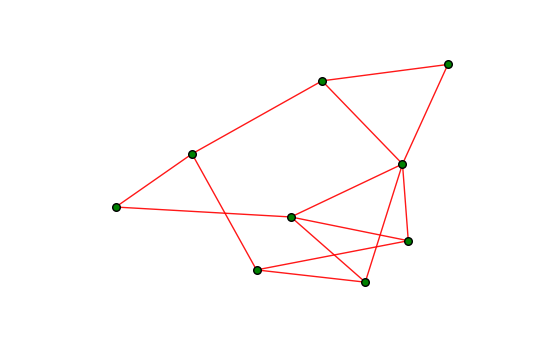

In [182]:
G=nx.Graph()

Nodes=range(9)
G.add_nodes_from(Nodes)
Edges=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(Edges)
G.add_edge(6,8)
#nx.draw(G, node_color='c',edge_color='k', with_labels=True)


# i can either:
#nx.draw_spring(G,node_size=50,edge_color='b',alpha=.52,font_size=10, scale=.1)

#or:

dict_positions=nx.spring_layout(G)
nx.draw_networkx_edges(G, dict_positions, edgelist=G.edges(), width=1.0, edge_color='r', style='solid', alpha=0.9)#, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, **kwds)       
        
nx.draw_networkx_nodes(G, dict_positions, nodelist=G.nodes(), node_color='g', node_size=30) #nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)
limits=plt.axis('off')  # plot network without axis around it



For now i work only with the GC.....
I get the layout for the 1-year acumulated network, but then i plot month by month, preserving the global positions of all nodes.


In [103]:
dict_tuplas={}
for node in dict_node_times_inf:
    #dict_node_times_inf[node]=np.mean(dict_node_times_inf[node])
    #print len(dict_node_times_inf[node]),   np.mean(dict_node_times_inf[node]) 
    dict_tuplas[node]=(np.mean(dict_node_times_inf[node]), len(dict_node_times_inf[node]) )

for w in sorted(dict_tuplas, key=dict_tuplas.get, reverse=True):
       print w, dict_tuplas[w]

113694 (1.0, 42)
2322766 (1.0, 27)
2323308 (1.0, 23)
2325706 (1.0, 23)
2322584 (1.0, 20)
2324374 (1.0, 17)
2320216 (1.0, 16)
204626 (1.0, 15)
2324210 (1.0, 15)
2325411 (1.0, 14)
508861 (1.0, 14)
2322134 (1.0, 14)
2324234 (1.0, 14)
2324775 (1.0, 11)
2324799 (1.0, 11)
2390474 (1.0, 11)
2390838 (1.0, 11)
2305677 (1.0, 11)
2300011 (1.0, 10)
2325354 (1.0, 10)
2389939 (1.0, 10)
2320253 (1.0, 9)
2323497 (1.0, 8)
2324039 (1.0, 8)
2301908 (1.0, 8)
2390152 (1.0, 7)
2323667 (1.0, 7)
2325755 (1.0, 7)
2389265 (1.0, 7)
2324283 (1.0, 7)
2322641 (1.0, 6)
2319470 (1.0, 6)
2390735 (1.0, 6)
2325238 (1.0, 6)
2320538 (1.0, 6)
2389061 (1.0, 6)
2323591 (1.0, 6)
2389150 (1.0, 6)
110036 (1.0, 6)
2323941 (1.0, 6)
2303516 (1.0, 6)
2315920 (1.0, 6)
2314150 (1.0, 6)
2319071 (1.0, 5)
2323163 (1.0, 5)
2315014 (1.0, 5)
2325317 (1.0, 5)
2300904 (1.0, 5)
2323564 (1.0, 5)
2391156 (1.0, 5)
2362685 (1.0, 5)
2319639 (1.0, 5)
2322808 (1.0, 5)
2390051 (1.0, 4)
2324489 (1.0, 4)
2325536 (1.0, 4)
2306426 (1.0, 4)
2366038 (1.0, 

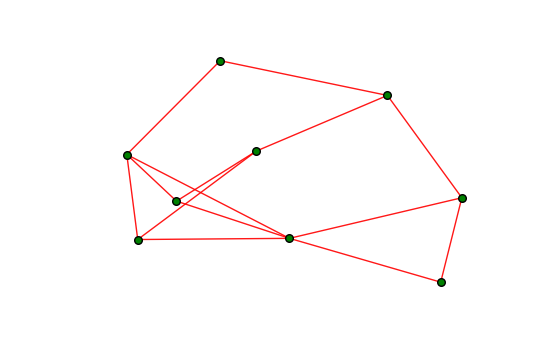

In [190]:
###### for testing
G=nx.Graph()
Nodes=range(9)
G.add_nodes_from(Nodes)
Edges=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(Edges)
G.add_edge(6,8)
dict_positions=nx.spring_layout(G)


nx.draw_networkx_edges(G, dict_positions, edgelist=G.edges(), width=1.0, edge_color='r', style='solid', alpha=0.9)#, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, **kwds)       
        
nx.draw_networkx_nodes(G, dict_positions, nodelist=G.nodes(), node_color='g', node_size=30) #nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)
limits=plt.axis('off')  # plot network without axis around it
